In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfmac = pd.read_csv("menu.csv")

In [3]:
dfmac

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


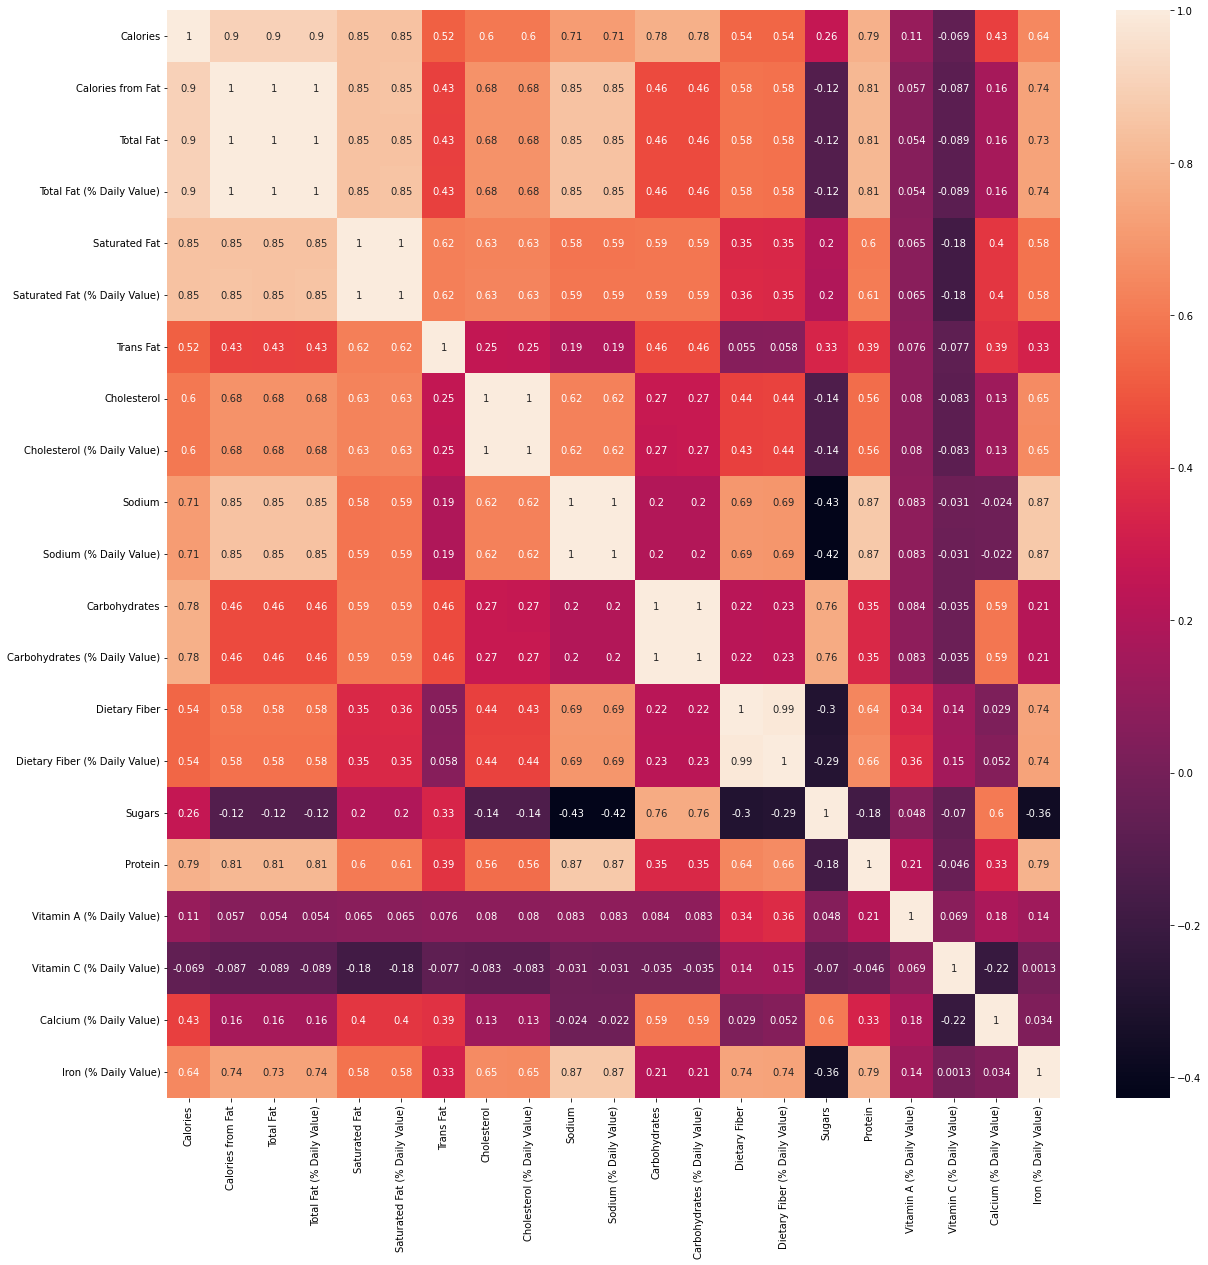

In [4]:
fig, ax = plt.subplots(figsize=(20,20))   
sns.heatmap(dfmac.corr(), annot=True);

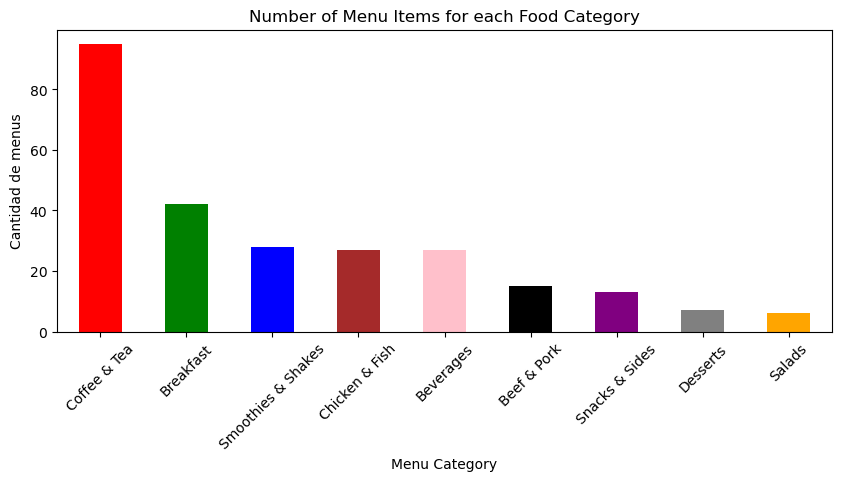

In [5]:
plt.figure(figsize=(10, 4), dpi=100)
menu_category = dfmac.Category.value_counts()
menu_category.plot.bar(color = ['red','green','blue','brown','pink','black','purple','grey','orange'])
plt.title("Number of Menu Items for each Food Category")
plt.ylabel("Cantidad de menus")
plt.xlabel("Menu Category")
plt.xticks(rotation=45)
plt.show()

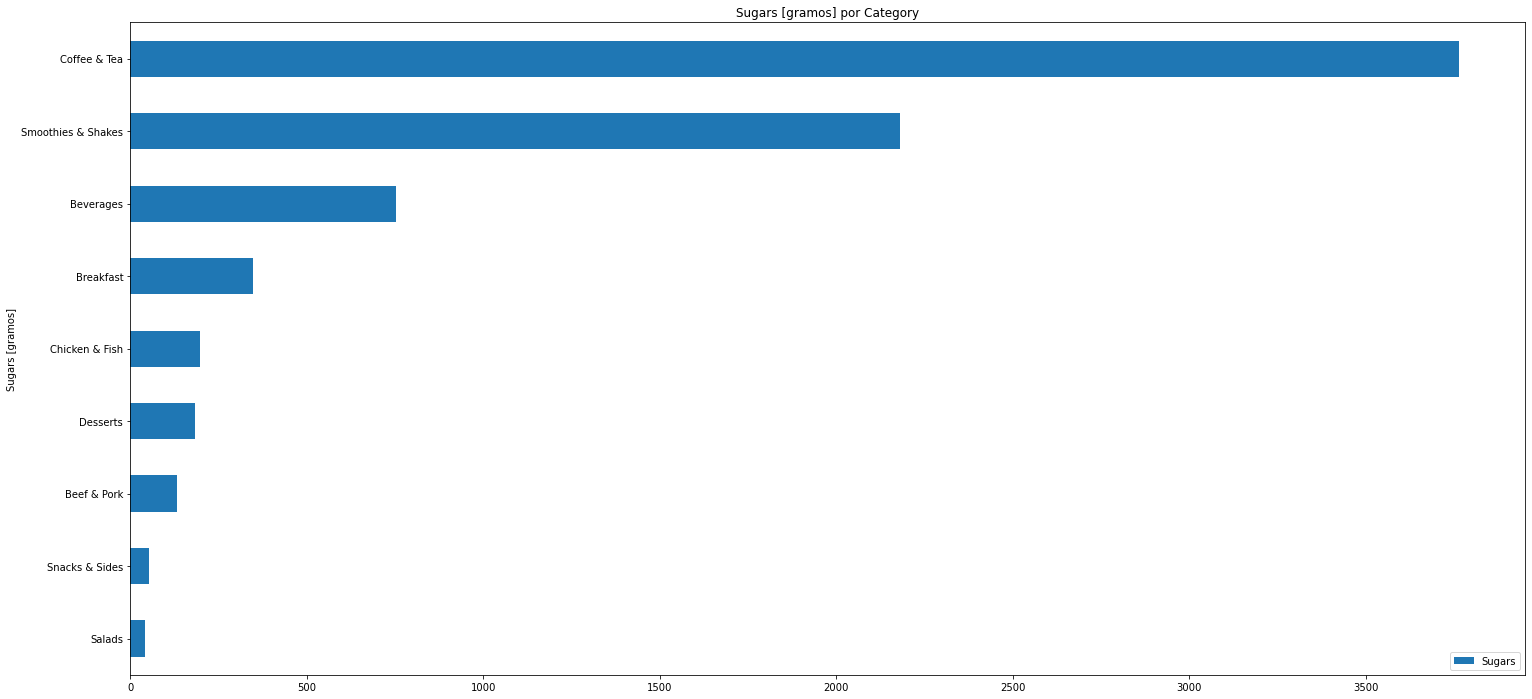

In [6]:
categories_by_sugars = dfmac[ ['Category', 'Sugars'] ] \
                           .groupby('Category') \
                           .sum() \
                           .sort_values('Sugars', ascending=True) \
                           .head(70)

categories_by_sugars

categories_by_sugars.plot(kind='barh', figsize=(25,12))

plt.ylabel('Sugars [gramos]')
plt.title('Sugars [gramos] por Category');

# Mejor hacer media o moda

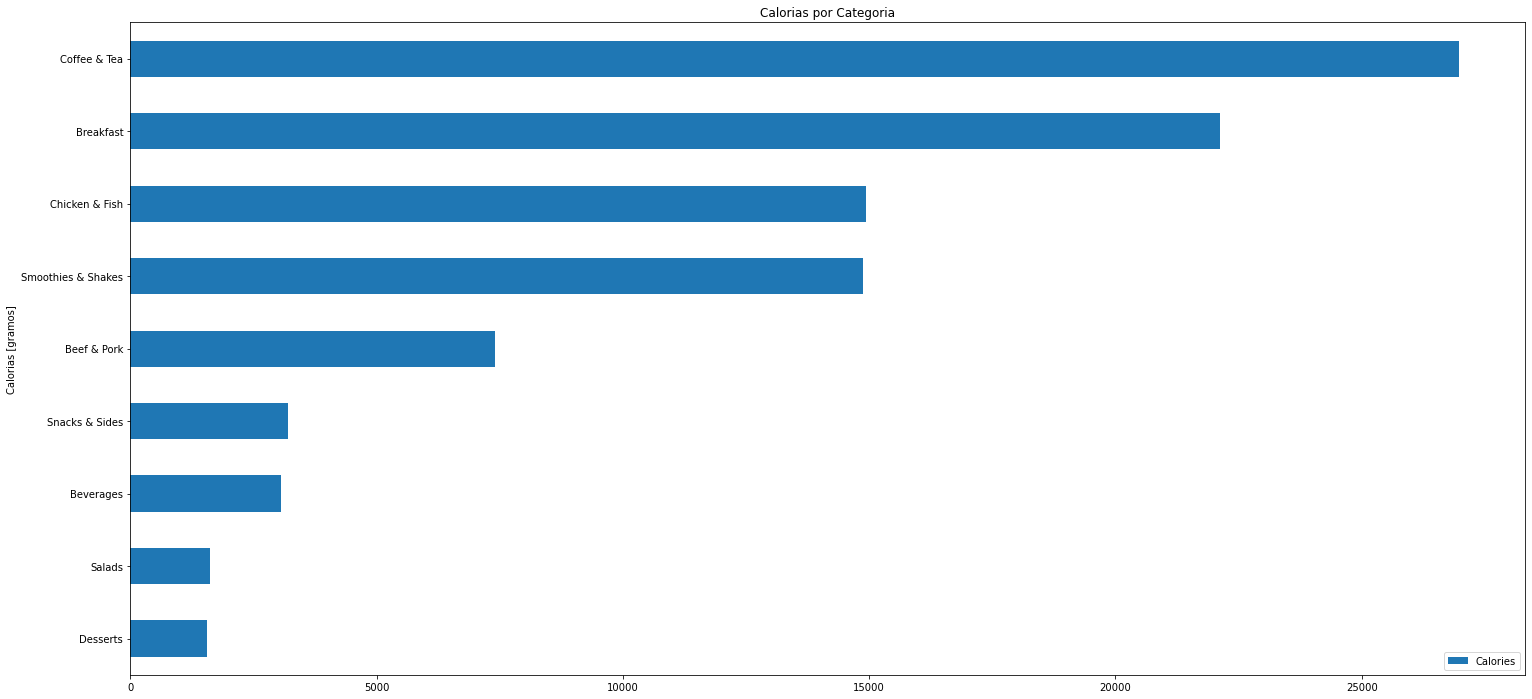

In [7]:
categories_by_calories = dfmac[ ['Category', 'Calories'] ] \
                           .groupby('Category') \
                           .sum() \
                           .sort_values('Calories', ascending=True) \
                           .head(70)

categories_by_calories

categories_by_calories.plot(kind='barh', figsize=(25,12))

plt.ylabel('Calorias [gramos]')
plt.title('Calorias por Categoria');

In [8]:
# Columns as Features
x = dfmac[["Sugars","Sodium"]]  

x

,Sugars,Sodium
0,3,750
1,3,770
2,2,780
3,2,860
4,2,880
...,...,...
255,64,280
256,85,380
257,43,190
258,103,400


In [9]:
y = dfmac["Calories"]

y

0      300
1      250
2      370
3      450
4      400
      ... 
255    510
256    690
257    340
258    810
259    410
Name: Calories, Length: 260, dtype: int64

In [10]:
# Divido los datos en conjunto de entrenamiento y test
# Siendo el tamaño del conjunto test un 30% y la semilla sea 42

from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [12]:
print("Total features shape:", x.shape)
print("Train features shape:", x_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", x_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (260, 2)
Train features shape: (182, 2)
Train target shape: (182,)
Test features shape: (78, 2)
Test target shape: (78,)


In [13]:
# Instancia y entrena un regresor lineal
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [14]:
# Entreno el modelo

lm.fit(x_train, y_train)

LinearRegression()

In [15]:
# Muestro el Score del modelo

from sklearn import metrics

lm.score(x_train, y_train)

0.8951857268460186

In [16]:
lm.score(x_test, y_test)

0.8951258925720617

## Linear Regression Ridge

In [17]:
from sklearn.linear_model import Ridge

Model_ridge = Ridge(alpha=10)
Model_ridge.fit(x_train, y_train)
Ridge()

Ridge()

In [18]:
print(Model_ridge.intercept_)
print(Model_ridge.coef_)

-1.9857680638605757
[5.69820698 0.4133157 ]


In [19]:
Model_ridge.score(x_train, y_train)

0.8951857240683668

In [20]:
Model_ridge.score(x_test, y_test)

0.8951237602555575

In [21]:
from sklearn.linear_model import Lasso

Model_lasso = Lasso(alpha=10)
Model_lasso.fit(x_train, y_train)
Lasso()

Lasso()

In [22]:
print(Model_lasso.intercept_)
print(Model_lasso.coef_)

-1.3771795083254688
[5.68368277 0.41295175]


In [23]:
Model_lasso.score(x_train, y_train)

0.8951827199340642

In [24]:
Model_lasso.score(x_test, y_test)

0.8950499137857818

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor

dfmac_tree = DecisionTreeRegressor(max_depth=3)
dfmac_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [45]:
dfmac_tree.score(x_train,y_train)

0.8368611335311116

In [46]:
dfmac_tree.score(x_test,y_test)

0.753421557617253

In [26]:
x_train.columns

Index(['Sugars', 'Sodium'], dtype='object')

In [48]:
dfmac_tree.predict(x_test)

array([ 690.        ,  284.5       ,  284.5       ,  408.53932584,
        203.33333333,  739.16666667,  284.5       ,  284.5       ,
        408.53932584,  408.53932584,  690.        ,  408.53932584,
        408.53932584,  284.5       ,  408.53932584,  129.77272727,
        739.16666667,  408.53932584,  203.33333333,  129.77272727,
         10.        ,  284.5       ,  408.53932584,  284.5       ,
        408.53932584,  408.53932584,  408.53932584,  408.53932584,
        203.33333333,  408.53932584,  284.5       ,  739.16666667,
        129.77272727, 1057.5       ,  129.77272727,  129.77272727,
        284.5       ,  408.53932584,  203.33333333,   10.        ,
        408.53932584,  408.53932584,  690.        ,  284.5       ,
        690.        ,  284.5       ,   10.        ,  408.53932584,
        408.53932584,  284.5       ,  408.53932584,  129.77272727,
        408.53932584,  408.53932584,  408.53932584,  408.53932584,
         10.        ,  408.53932584,  284.5       ,  408.53932

## Random Forest

In [53]:
from sklearn.ensemble import RandomForestRegressor

mac_random = RandomForestRegressor(n_estimators=500)
                                 
mac_random.fit(x_train, y_train)


RandomForestRegressor(n_estimators=500)

In [54]:
mac_random.score(x_train, y_train)

0.9850407950634166

In [55]:
mac_random.score(x_test, y_test)

0.8023026684276455

## Adaboost

In [62]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import accuracy_score

estimator = DecisionTreeRegressor(max_depth=3)

ada_clf = AdaBoostRegressor(base_estimator = estimator,
                             n_estimators=200)


ada_clf.fit(x_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=200)

In [63]:
ada_clf.score(x_train, y_train)

0.9177331225083342

In [64]:
ada_clf.score(x_test, y_test)

0.7930517916512227

## XGBoost


In [ ]:
!pip install xgboost

In [71]:
import xgboost

mac_xgboost = xgboost.XGBRegressor()

mac_xgboost.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [72]:
mac_xgboost.score(x_train, y_train)

0.9978111468321605

In [73]:
mac_xgboost.score(x_test, y_test)

0.8019099152591482

## KNN

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

escalado1 = scaler.fit(x_train)
x_train_escalado = scaler.transform(x_train)
x_test_escalado = scaler.transform(x_test)

In [77]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [78]:
# Creo el conjunto de features X solo con 'Sugars' y 'Sodium' y el conjunto de targe y

# Train/test con test_size = 0.2 y random_state=0

x = dfmac[['Sugars','Sodium']]
y = dfmac['Calories']

In [79]:
# Interesante ver los valores únicos de "Calorias"

dfmac['Calories'].unique()

array([ 300,  250,  370,  450,  400,  430,  460,  520,  410,  470,  480,
        510,  570,  540,  420,  550,  500,  620,  670,  740,  800,  640,
        690, 1090, 1150,  990, 1050,  350,  150,  290,  260,  530,  600,
        610,  750,  240,  720,  380,  440,  590,  360,  630,  190,  280,
        940, 1880,  390,  140,  220,  340,  330,  230,  110,   20,   15,
        160,   45,  200,  100,    0,  270,  130,   80,  180,  170,  210,
        310,  320,  120,  760,  660,  820,  850,  560,  700,  650,  930,
        810])

In [80]:
dfmac['Sugars'].unique()

array([  3,   2,   4,  15,  16,   7,   8,  17,  18,  14,   0,  32,   9,
        10,  12,   6,  11,   5,   1,  23,  13,  48,  43,  45,  39,  55,
        76,  28,  35,  51,  70,  26,  37,  54,  74,  27,  22,  19,  30,
        58,  36,  20,  38,  59,  47,  56,  21,  46,  42,  53,  63,  64,
        40,  50,  60,  41,  61,  68,  57,  69,  34,  62,  33,  71,  88,
        67,  81,  99,  44,  72, 101,  79, 100, 123,  77,  97, 120,  93,
       115,  89, 128,  85, 103])

In [81]:
dfmac['Sodium'].unique()

array([ 750,  770,  780,  860,  880,  960, 1300, 1410, 1420, 1080, 1190,
       1170, 1280, 1180, 1290, 1470, 1250, 1030, 1320, 1480, 1510, 1560,
       1680, 1590, 1700, 2150, 2260, 2170, 2290,  590,  930,  790,  310,
        370,  160,  115, 1100, 1440,  480,  680, 1040,  840, 1110,  760,
        980,  990,  820, 1400, 1230, 1720,  910,  800, 1260, 1540, 1370,
       1340, 1090,  360,  540,  900, 1800, 3600,  300,  690,  150,  850,
        700,  730,  650,  810,  720,  130,  190,  290,   65,   10,    0,
         70,  170,   90,  135,   20,   85,    5,   35,   15,   45,   30,
        100,  140,   50,   60,   25,  125,  180,  240,  110,  220,  270,
        210,  280,   75,   40,   55,   80,  250,  200,  260,  380,  120,
        400])

In [82]:
# Shapes

from sklearn.model_selection import train_test_split

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0)

In [84]:
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

x_train (208, 2)
x_test (52, 2)
y_train (208,)
y_test (52,)


In [85]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

escalado1 = scaler.fit(x_train)
x_train_escalado = scaler.transform(x_train)
x_test_escalado = scaler.transform(x_test)

In [86]:
# CREO EL MODELO 

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

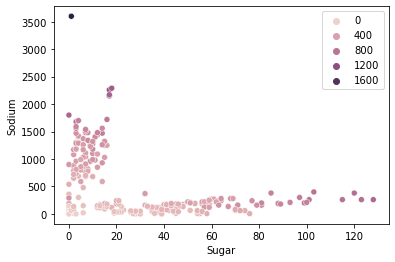

In [87]:
ax = plt.axes()

sns.scatterplot(x="Sugars", y="Sodium", data=dfmac, hue="Calories")

plt.xlabel("Sugar")
plt.ylabel("Sodium")
ax.legend();

In [98]:
dfmac[["Sugars","Sodium"]]

,Sugars,Sodium
0,3,750
1,3,770
2,2,780
3,2,860
4,2,880
...,...,...
255,64,280
256,85,380
257,43,190
258,103,400


In [89]:
knn = KNeighborsRegressor(5)
knn.fit(x_train_escalado, y_train)

KNeighborsRegressor()

In [90]:
knn.score(x_test_escalado, y_test)

0.91845528440402